In [1]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math


In [2]:
%matplotlib inline

In [5]:
m = n = l = 3 # L of square grid

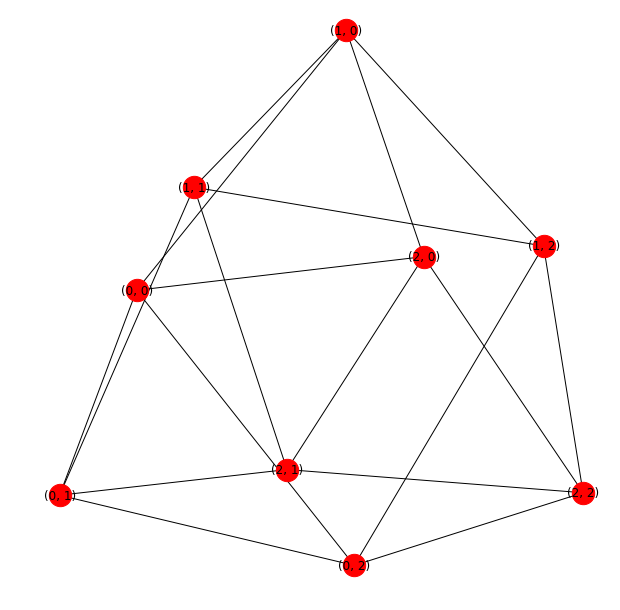

In [52]:
import imp 

import graph_gen
imp.reload(graph_gen)

periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [53]:
import model
import imp
imp.reload(model)
tree = model.model(N, H, J, J_interaction)
#tree_rand = model.model(N, H_rand, J_rand, J_interaction_rand)

fe_ex = []
ener_ex = []
m_ex = []
m_i_ex = []
for beta in betas_fast:
    tree.exact(beta)
    fe_ex.append(tree.free_energy)
    ener_ex.append(tree.E_mean)
    m_ex.append(tree.M_mean)
    m_i_ex.append(tree.M_i_mean)

beta: 0.0, Fe: -693147.181 Energy: -4.91e-07 M: -1.5e-17 S: 0.693
beta: 0.1, Fe: -6.956 Energy: -0.0502 M: 8.86e-18 S: 0.691
beta: 0.2, Fe: -3.516 Energy: -0.102 M: 4.05e-18 S: 0.683
beta: 0.3, Fe: -2.387 Energy: -0.155 M: 1.85e-17 S: 0.67
beta: 0.4, Fe: -1.836 Energy: -0.208 M: 9.25e-18 S: 0.651
beta: 0.5, Fe: -1.515 Energy: -0.259 M: -8.84e-18 S: 0.628
beta: 0.6, Fe: -1.310 Energy: -0.307 M: -2.8e-18 S: 0.602
beta: 0.7, Fe: -1.170 Energy: -0.351 M: 7.82e-18 S: 0.573
beta: 0.8, Fe: -1.070 Energy: -0.391 M: -8.85e-18 S: 0.543
beta: 0.9, Fe: -0.997 Energy: -0.426 M: 7.69e-18 S: 0.514
beta: 1.0, Fe: -0.941 Energy: -0.456 M: -2.43e-18 S: 0.485
beta: 1.1, Fe: -0.898 Energy: -0.481 M: 1.27e-18 S: 0.459
beta: 1.2, Fe: -0.864 Energy: -0.503 M: -2.88e-18 S: 0.434
beta: 1.3, Fe: -0.837 Energy: -0.522 M: 3.15e-19 S: 0.411
beta: 1.4, Fe: -0.815 Energy: -0.537 M: 6.08e-18 S: 0.39
beta: 1.5, Fe: -0.797 Energy: -0.55 M: 5.31e-18 S: 0.37
beta: 1.6, Fe: -0.782 Energy: -0.562 M: 2.02e-18 S: 0.353
beta:

In [56]:
import imp
import solvers
imp.reload(solvers)
imp.reload(bp_nn)
res_nn = solvers.nn_sol(tree, betas_fast, max_step=500, bias = True, z2 = False, x_hat_clip = False)


 0.00 500 fe: -693147.182 +- 0.04499 E: -0.004, S: 0.693, M: -0.0111, W: 8.22966e-07, -1.7129e-06, Bias: 0.000000 - -0.000000
 0.10 500 fe: -6.956 +- 0.00752 E: -0.052, S: 0.690, M: 0.00311, W: 0.0956332, -0.15816, Bias: 0.000628 - 0.000514
 0.20 500 fe: -3.516 +- 0.01558 E: -0.099, S: 0.683, M: 0.00267, W: 0.199108, -0.316383, Bias: -0.000672 - 0.003925
 0.30 500 fe: -2.388 +- 0.02234 E: -0.158, S: 0.669, M: 0.00511, W: 0.310342, -0.469587, Bias: 0.000374 - 0.002046
 0.40 500 fe: -1.833 +- 0.02913 E: -0.194, S: 0.656, M: -0.000222, W: 0.425463, -0.63147, Bias: -0.008021 - -0.000850
 0.50 500 fe: -1.513 +- 0.03459 E: -0.248, S: 0.633, M: 0.00867, W: 0.55269, -0.785766, Bias: 0.004618 - 0.005519
 0.60 500 fe: -1.306 +- 0.03852 E: -0.297, S: 0.605, M: -0.006, W: 0.670303, -0.928268, Bias: -0.005820 - 0.013317
 0.70 500 fe: -1.162 +- 0.04134 E: -0.334, S: 0.579, M: -0.00778, W: 0.797451, -1.07843, Bias: -0.004778 - 0.003580
 0.80 500 fe: -1.063 +- 0.04503 E: -0.360, S: 0.563, M: 0.00156, 

In [57]:
res_nn_z2 = solvers.nn_sol(tree, betas_fast, max_step=500, bias = True, z2 = True, x_hat_clip = False)

 0.00 500 fe: -693147.587 +- 9.16739 E: 0.004, S: 0.693, M: 0.00556, W: -4.30842e-07, -1.43615e-06, Bias: -0.000003 - -0.551737
 0.10 500 fe: -6.956 +- 0.00545 E: -0.044, S: 0.691, M: 0.00311, W: 0.0952345, -0.158076, Bias: -0.018764 - -0.327858
 0.20 500 fe: -3.516 +- 0.00348 E: -0.102, S: 0.683, M: -0.00422, W: 0.201328, -0.316017, Bias: -0.039026 - 0.024289
 0.30 500 fe: -2.387 +- 0.00524 E: -0.164, S: 0.667, M: 0.0151, W: 0.315956, -0.472787, Bias: -0.080062 - 0.062582
 0.40 500 fe: -1.836 +- 0.00679 E: -0.207, S: 0.652, M: 0.0144, W: 0.437299, -0.629159, Bias: -0.102284 - 0.143254
 0.50 500 fe: -1.515 +- 0.00778 E: -0.262, S: 0.626, M: -0.00178, W: 0.573698, -0.788295, Bias: -0.122714 - 0.259733
 0.60 500 fe: -1.310 +- 0.00835 E: -0.303, S: 0.604, M: 0.00711, W: 0.720505, -0.942864, Bias: -0.128017 - 0.401761
 0.70 500 fe: -1.170 +- 0.00892 E: -0.345, S: 0.578, M: 0.00244, W: 0.870379, -1.09897, Bias: -0.123403 - 0.560171
 0.80 500 fe: -1.070 +- 0.00876 E: -0.392, S: 0.542, M: 0.0

In [58]:
import solvers
imp.reload(solvers)

res_bp = solvers.bp_sol(tree, betas_fast)

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -6.956, ener: -0.049, M: 0.000, iter 1
fe: -3.515, ener: -0.098, M: 0.000, iter 1
fe: -2.384, ener: -0.145, M: 0.000, iter 1
fe: -1.830, ener: -0.191, M: 0.000, iter 1
fe: -1.507, ener: -0.236, M: 0.000, iter 1
fe: -1.298, ener: -0.279, M: 0.000, iter 1
fe: -1.156, ener: -0.319, M: 0.000, iter 1
fe: -1.053, ener: -0.357, M: 0.000, iter 1
fe: -0.978, ener: -0.393, M: 0.000, iter 1
fe: -0.921, ener: -0.426, M: 0.000, iter 1
fe: -0.878, ener: -0.457, M: 0.000, iter 1
fe: -0.844, ener: -0.485, M: 0.000, iter 1
fe: -0.817, ener: -0.512, M: 0.000, iter 1
fe: -0.796, ener: -0.536, M: 0.000, iter 1
fe: -0.780, ener: -0.558, M: 0.000, iter 1
fe: -0.767, ener: -0.578, M: 0.000, iter 1
fe: -0.756, ener: -0.597, M: 0.000, iter 1
fe: -0.748, ener: -0.613, M: 0.000, iter 1
fe: -0.741, ener: -0.629, M: 0.000, iter 1
fe: -0.736, ener: -0.643, M: 0.000, iter 1


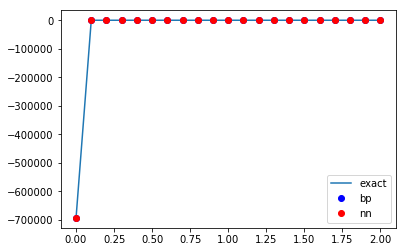

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas_fast
plt.plot(x, fe_ex, label = "exact")
plt.plot(x,fe_bp, "bo", label="bp")
plt.plot(x,fe_nn, "ro", label="nn")
#plt.plot(x,fe_nn_rand, "go", label="bp")
plt.legend()
plt.show()

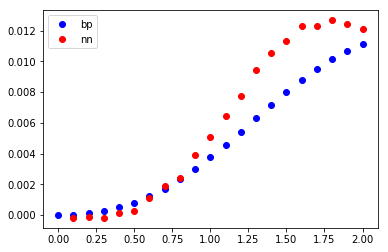

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas_fast
fe_ex = np.array(fe_ex)
fe_bp = np.array(fe_bp)
fe_nn = np.array(fe_nn)
#fe_nn_rand = np.array(fe_nn_rand)

plt.plot(x, fe_bp - fe_ex, "bo", label="bp")
plt.plot(x[1:], fe_nn[1:] - fe_ex[1:], "ro", label="nn")
#plt.plot(x, fe_nn_rand - fe_ex, "go", label="nn_rand")

plt.legend()
plt.show()

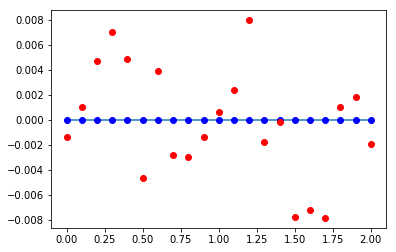

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas_fast
plt.plot(x, m_ex, label = "exact")
plt.plot(x,m_bp, "bo", label="bp")
plt.plot(x,m_nn, "ro", label="nn")
#plt.plot(x,m_nn_rand, "go", label="nn")
plt.legend
plt.show()

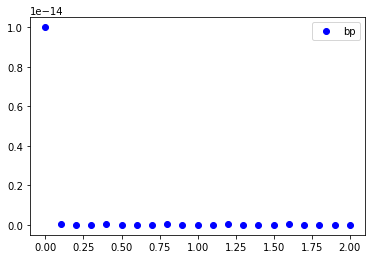

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas_fast

m_ex = np.array(m_ex)
m_bp = np.array(m_bp)
m_nn = np.array(m_nn)
#m_nn_rand = np.array(m_nn_rand)

plt.plot(x, m_bp - m_ex, "bo", label="bp")
#plt.plot(x, m_nn - m_ex, "ro", label="nn")
#plt.plot(x, m_nn_rand - m_ex, "go",label = "nn_rand")

plt.legend()
plt.show()

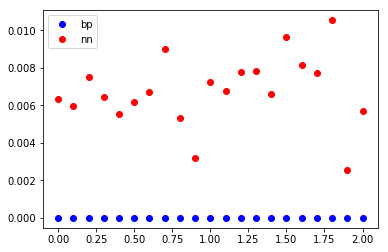

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
x = betas_fast

m_i_ex = np.array(m_i_ex)
#m_bp = np.array(m_bp)
m_i_nn = np.array(m_i_nn)
#m_i_nn_rand = np.array(m_i_nn_rand)

plt.plot(x, abs(m_i_bp - m_i_ex).sum(axis=1)/N, "bo", label="bp")
plt.plot(x, abs(m_i_nn - m_i_ex).sum(axis=1)/N, "ro", label="nn")
#plt.plot(x, abs(m_i_nn_rand - m_i_ex).sum(axis=1)/N, "go",label = "nn_rand")

plt.legend()
plt.show()